In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.tree import plot_tree
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from dataset_functions import *
#branch loda
dataset_path = "../dataset/mlcourse-dota2-win-prediction/train_features.csv"

In [14]:
df, target = get_dataset()
df, target = playerstats_teamheros_transform(df,target)
#df, target = playerstats_playerheros_transform(df,target)
#df, target = teamstats_teamheros_transform(df,target)

Features:  Index(['match_id_hash', 'game_time', 'game_mode', 'lobby_type',
       'objectives_len', 'chat_len', 'r1_hero_id', 'r1_kills', 'r1_deaths',
       'r1_assists',
       ...
       'd5_stuns', 'd5_creeps_stacked', 'd5_camps_stacked', 'd5_rune_pickups',
       'd5_firstblood_claimed', 'd5_teamfight_participation',
       'd5_towers_killed', 'd5_roshans_killed', 'd5_obs_placed',
       'd5_sen_placed'],
      dtype='object', length=246) 

Target Columns:  Index(['match_id_hash', 'game_time', 'radiant_win', 'duration',
       'time_remaining', 'next_roshan_team'],
      dtype='object') 

Filtering Df:  (game_mode == 2 or game_mode == 22) and game_time > 0 

Dropped:  ['lobby_type', 'chat_len', 'game_mode'] 

Dataframe Shape:  (32153, 243) 

Hero Id Labels: ['r1_hero_id', 'r2_hero_id', 'r3_hero_id', 'r4_hero_id', 'r5_hero_id', 'd1_hero_id', 'd2_hero_id', 'd3_hero_id', 'd4_hero_id', 'd5_hero_id'] 

Numbers of Heros:  115 

Dataframe Shape: (32153, 463) 

NaN Count:  0 

(32153, 6)


In [15]:
win = target["radiant_win"].astype(int)
#X = np.array(df.values)
#Y = np.array(win)


In [16]:
np.random.seed(seed=10)

X_train,X_test,Y_train,Y_test = train_test_split(df,win,test_size=0.2)

In [41]:
feature_selector = RandomForestClassifier(max_depth=10,class_weight="balanced")

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

pca = PCA(n_components=0.999)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

feature_selector.fit(X_train,Y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10)

In [40]:
Y_pred = feature_selector.predict(X_test)

acc = accuracy_score(Y_test,Y_pred)
auc = roc_auc_score(Y_test,Y_pred)

print("Accouracy ",acc)
print("Auc",auc)

print(X_train)

Accouracy  0.4954128440366973
Auc 0.4964222795888065
[[ 0.70706617 -0.82830181 -0.01949112  0.08993855 -0.03458904  0.04490187]
 [-0.34269194  0.74304534  1.29605307 -0.19603855  0.14190558 -0.4778698 ]
 [ 0.27250683 -0.10963306  0.118538   -0.89382217  0.42016454  0.41885975]
 ...
 [ 1.49023527 -0.5108497   0.38619626  0.21196677  0.40356953  0.46748432]
 [-0.81616628  0.51491646  0.31402771 -0.04376103  0.15102404  0.35544187]
 [ 0.3679985  -0.11597538  0.26926801 -0.85046782  0.22110966  0.36409133]]


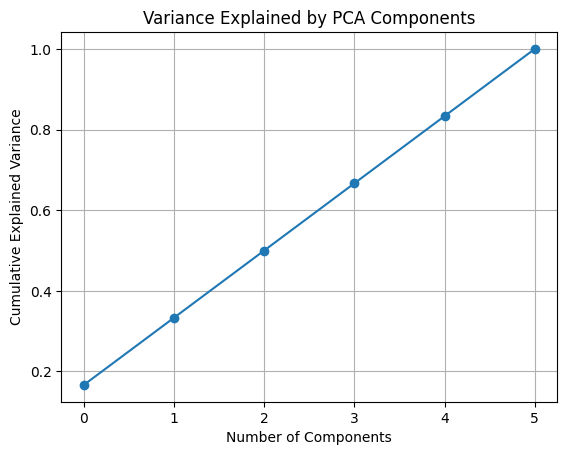

In [38]:
# Cumulative explained variance plot
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumulative_variance, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Variance Explained by PCA Components")
plt.grid()
plt.show()


In [18]:
Y_pred = feature_selector.predict(X_test)

acc = accuracy_score(Y_test,Y_pred)
auc = roc_auc_score(Y_test,Y_pred)

print("Accouracy ",acc)
print("Auc",auc)

print(X_train)

feature_importance = {
    name: value 
    for name,value in zip(feature_selector.feature_names_in_,feature_selector.feature_importances_)
}

# Feature importance
#feature_importance = feature_selector.feature_importances_
#print(feature_importance)

feature_importance = dict(reversed(sorted(feature_importance.items(), key=lambda item: item[1])))
print(feature_importance)
feature_names = list(feature_importance.keys())[:10]
#print(list(feature_importance.keys())[-10:])
#print(feature_names)
print(list(feature_importance.keys()))
#print(feature_importance["d_58"])
#print(feature_importance["d_68"])
#print(feature_importance["r_32"])
#print(feature_importance["d_32"]) 
#print(feature_importance["r2_y"])
#print(feature_importance["d_towers_killed"])
#print(feature_importance["objectives_len"])
#print(feature_importance["d_teamfight_participation"])

Accouracy  0.5352200279894263
Auc 0.5301792602347584
[[ -2490.77449442  -1338.15902499  -1362.45289569 ...  -5374.70871351
     679.03274976   -455.84748299]
 [  1511.18334636   4436.57299443    832.22361751 ...   1669.07574176
   -8207.88772036   1122.29673905]
 [-31180.74803214    163.75642875   -320.48712192 ...    -73.75025606
     352.5188719    -372.60117045]
 ...
 [-12435.29924273  -1871.72232529    624.06142328 ...   2514.13117384
    -227.91165591    870.92910468]
 [ -1801.8355158    2814.63010163   1286.23501332 ...    170.63599303
    1321.54955187   4093.38230039]
 [-28421.51083989    464.33066743     34.84632712 ...    377.06481099
     750.90853053    437.3895905 ]]


AttributeError: 'RandomForestClassifier' object has no attribute 'feature_names_in_'

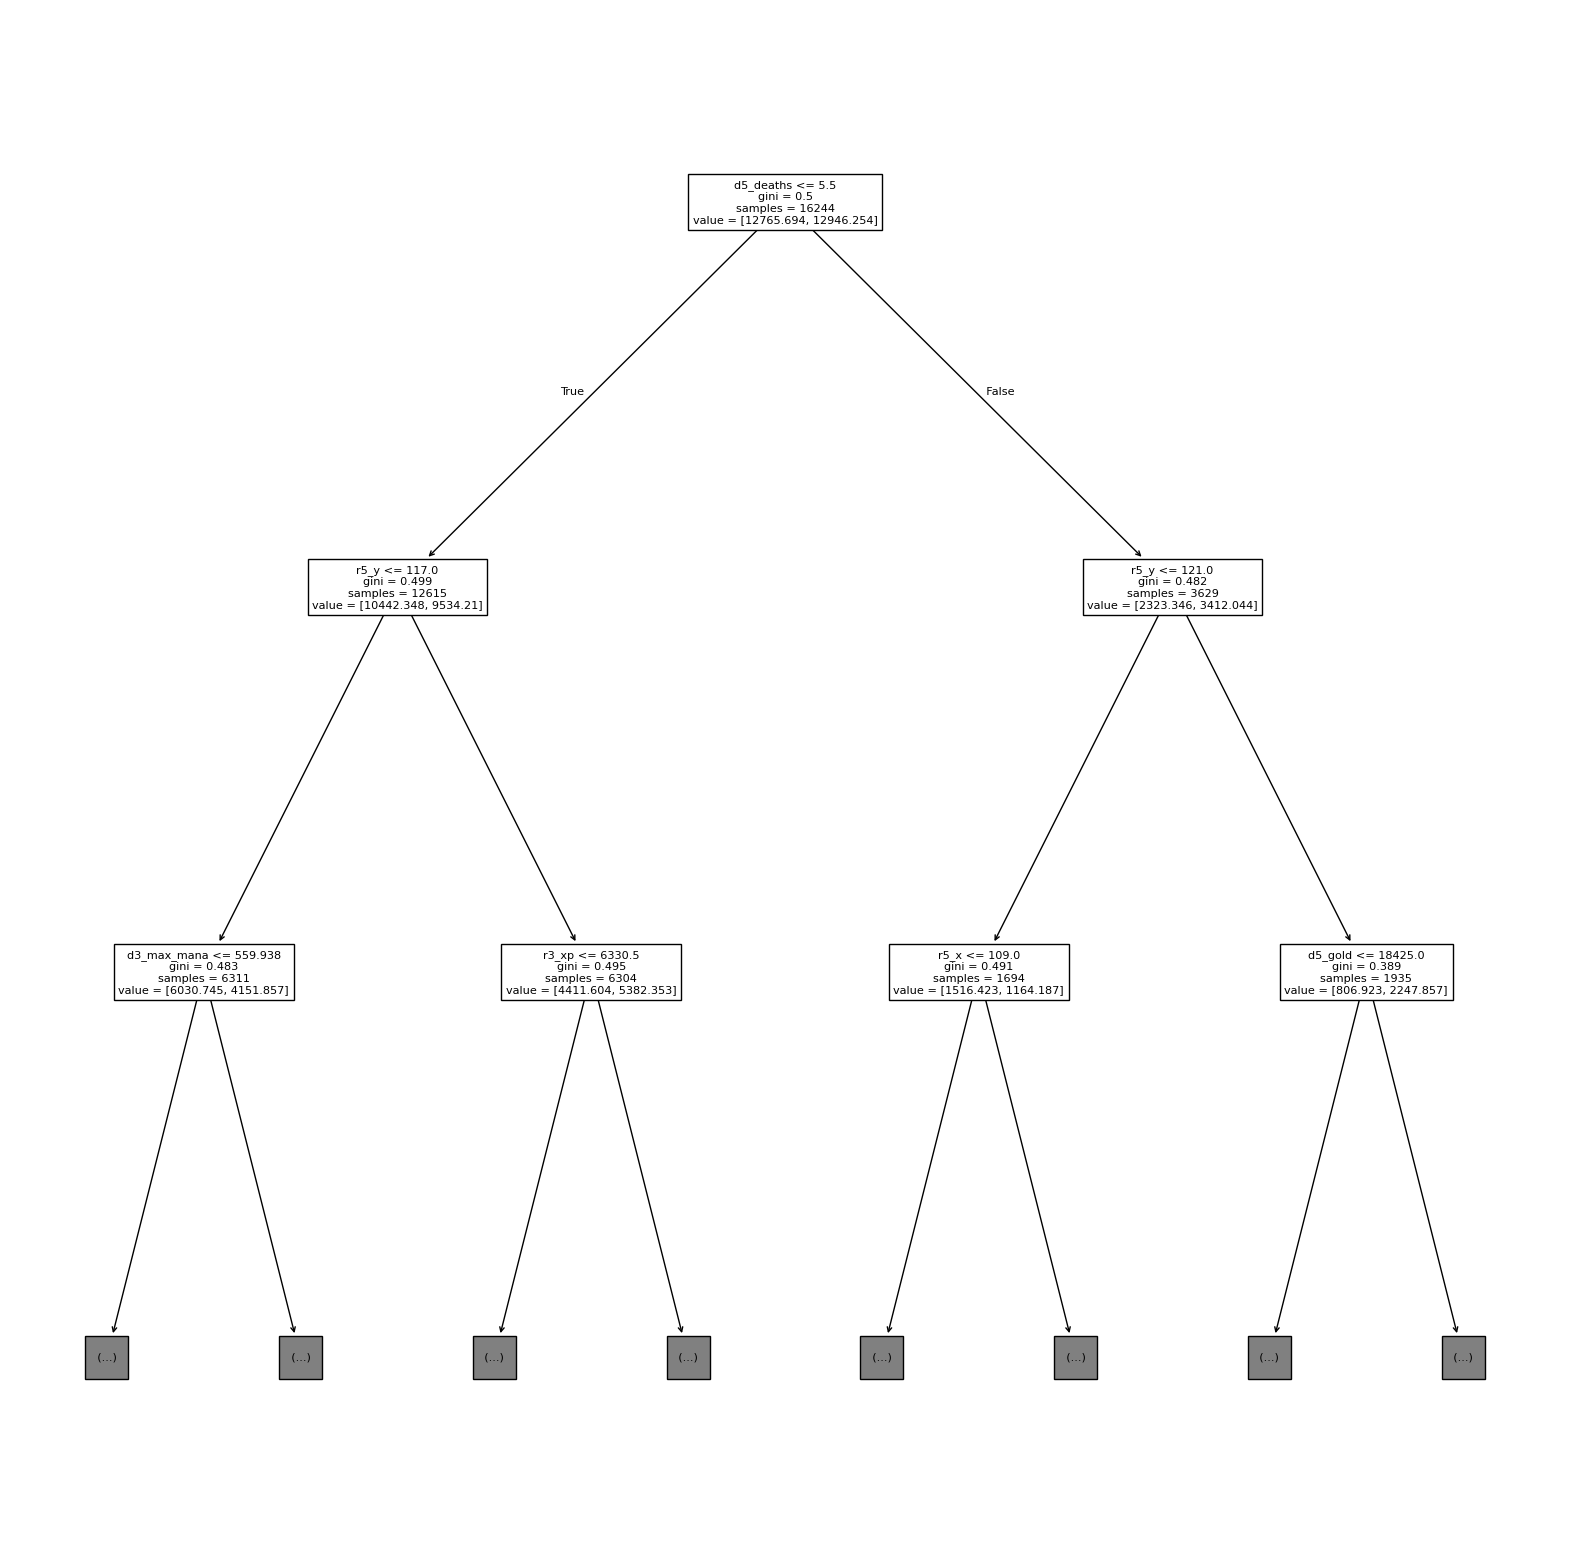

In [ ]:
tree = feature_selector.estimators_[1]

plt.figure(figsize=(20,20))
plot_tree(tree,max_depth=2,feature_names=df.columns)
plt.show()